## 爬取(下載)資料

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import  ensemble, preprocessing, metrics

In [3]:
# import requests
# url = "https://storage.googleapis.com/kaggle-datasets/854/1575/nyse.zip"
# header = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
# data = {"GoogleAccessId": "web-data@kaggle-161607.iam.gserviceaccount.com",
# "Expires": "1549443810",
# 'Signature': 'ihAvN5GNtZlnS6JoWy6FsbB+f3i9qDBD6IlBFkdp8lF9XmVE4KnwHKzmcwyYQtDUQt7Z7eouFZ1fnCvw/HuM0H9HoTDZlG9zRPz53UnwoKsruMIlDnVzwHUx1bpcJQY98IBluUdDpUEpNDZhg56nKoQ8MYs5rIMhKIA/xqCxOFymDmEB2DCGJTb3IjViBGSTbnuWJjs+g/X85ihhMFO9dOxGJ3+tAT6SsivYwG0wSjGZm3W1gySVg9+ECEdUFpuov74b9ZL0CeXZPcwrf93OYEd7Ep8hoGCj+8WhiXVVymfaVv2wDnLd78r3K9cYuP6DYtfjFAifGHOKcuOhvyGE5g=='}
# res = requests.get(url,params = data,headers = header)
# with open("nyse.zip","wb") as nyse:
#     nyse.write(res.content)
#需登入帳戶 故以匯入方式執行

解壓縮(需事先下載資料)https://www.kaggle.com/dgawlik/nyse/version/3

In [4]:
import zipfile
zip_ref = zipfile.ZipFile("nyse.zip",'r')
zip_ref.extractall("")
zip_ref.close()

## 匯入資料

In [5]:
import pandas as pd
price = pd.read_csv("prices-split-adjusted.csv")
securities = pd.read_csv("securities.csv")

In [6]:
#預覽
print(price[:-5:-1])
print(securities[5::-1])

              date symbol       open      close        low       high  \
851263  2016-12-30    FTV  54.200001  53.630001  53.389999  54.480000   
851262  2016-12-30    AIV  44.730000  45.450001  44.410000  45.590000   
851261  2016-12-30    ZTS  53.639999  53.529999  53.270000  53.740002   
851260  2016-12-30   ZION  43.070000  43.040001  42.689999  43.310001   

           volume  
851263   705100.0  
851262  1380900.0  
851261  1701200.0  
851260  1938100.0  
  Ticker symbol             Security SEC filings             GICS Sector  \
5           AYI    Acuity Brands Inc     reports             Industrials   
4          ATVI  Activision Blizzard     reports  Information Technology   
3           ACN        Accenture plc     reports  Information Technology   
2          ABBV               AbbVie     reports             Health Care   
1           ABT  Abbott Laboratories     reports             Health Care   
0           MMM           3M Company     reports             Industrials   

 

## 資料預處理

In [7]:
price = price.set_index(price["date"],drop = True)
del price["date"]
price.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [8]:
price.index = pd.to_datetime(price.index, format = "%Y-%m-%d")
type(price.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [9]:
#僅篩選WLTW資料
price = price[price["symbol"]=="WLTW"]
price.head

<bound method NDFrame.head of            symbol        open       close         low        high     volume
date                                                                        
2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0
2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998  2489500.0
2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002  2006300.0
2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002  1408600.0
2016-01-12   WLTW  115.510002  115.550003  114.500000  116.059998  1098000.0
2016-01-13   WLTW  116.459999  112.849998  112.589996  117.070000   949600.0
2016-01-14   WLTW  113.510002  114.379997  110.050003  115.029999   785300.0
2016-01-15   WLTW  113.330002  112.529999  111.919998  114.879997  1093700.0
2016-01-19   WLTW  113.660004  110.379997  109.870003  115.870003  1523500.0
2016-01-20   WLTW  109.059998  109.300003  108

## 空值處理

In [10]:
#為保留時間序列格式以及最小值 指派為9999-12-31
from datetime import datetime
securities = securities.fillna("9999-12-31")

In [11]:
securities["Date first added"]

0      9999-12-31
1      1964-03-31
2      2012-12-31
3      2011-07-06
4      2015-08-31
5      2016-05-03
6      1997-05-05
7      2015-07-09
8      9999-12-31
9      1976-06-30
10     2014-07-01
11     9999-12-31
12     9999-12-31
13     1985-04-30
14     2007-07-12
15     2016-05-13
16     2016-07-01
17     2012-05-25
18     2013-12-02
19     9999-12-31
20     2013-12-23
21     2016-07-01
22     9999-12-31
23     2014-04-03
24     9999-12-31
25     9999-12-31
26     2005-11-18
27     1991-09-19
28     2015-03-23
29     9999-12-31
          ...    
475    2009-12-21
476    9999-12-31
477    9999-12-31
478    1982-08-31
479    1979-12-31
480    9999-12-31
481    9999-12-31
482    2008-10-31
483    1976-06-30
484    2009-01-30
485    2009-07-01
486    9999-12-31
487    9999-12-31
488    9999-12-31
489    9999-12-31
490    9999-12-31
491    1975-03-31
492    2016-01-05
493    9999-12-31
494    2008-11-14
495    9999-12-31
496    9999-12-31
497    9999-12-31
498    9999-12-31
499    201

In [12]:
pd.DataFrame(securities["Date first added"].groupby(securities["GICS Sector"]).min())

,Date first added
GICS Sector,
Consumer Discretionary,1970-06-30
Consumer Staples,1969-03-31
Energy,1965-03-31
Financials,1975-06-30
Health Care,1964-03-31
Industrials,1964-03-31
Information Technology,1974-12-31
Materials,1964-06-30
Real Estate,2007-01-10


In [13]:
#依產業別分類之最早加入日期
from datetime import timedelta
import numpy as np
earlyest = pd.DataFrame(securities["Date first added"].groupby(securities["GICS Sector"]).min())
now =datetime.now()
for i in earlyest.index:
    earlyest.loc[i,"Days to now"] = now - datetime.strptime(earlyest.loc[i,"Date first added"],"%Y-%m-%d")
earlyest

,Date first added,Days to now
GICS Sector,,
Consumer Discretionary,1970-06-30,17763 days 14:15:30.614162
Consumer Staples,1969-03-31,18219 days 14:15:30.614162
Energy,1965-03-31,19680 days 14:15:30.614162
Financials,1975-06-30,15937 days 14:15:30.614162
Health Care,1964-03-31,20045 days 14:15:30.614162
Industrials,1964-03-31,20045 days 14:15:30.614162
Information Technology,1974-12-31,16118 days 14:15:30.614162
Materials,1964-06-30,19954 days 14:15:30.614162
Real Estate,2007-01-10,4420 days 14:15:30.614162


## 視覺化分析

([<matplotlib.axis.XTick at 0x1ddf526c208>,
 <a list of 11 Text xticklabel objects>)

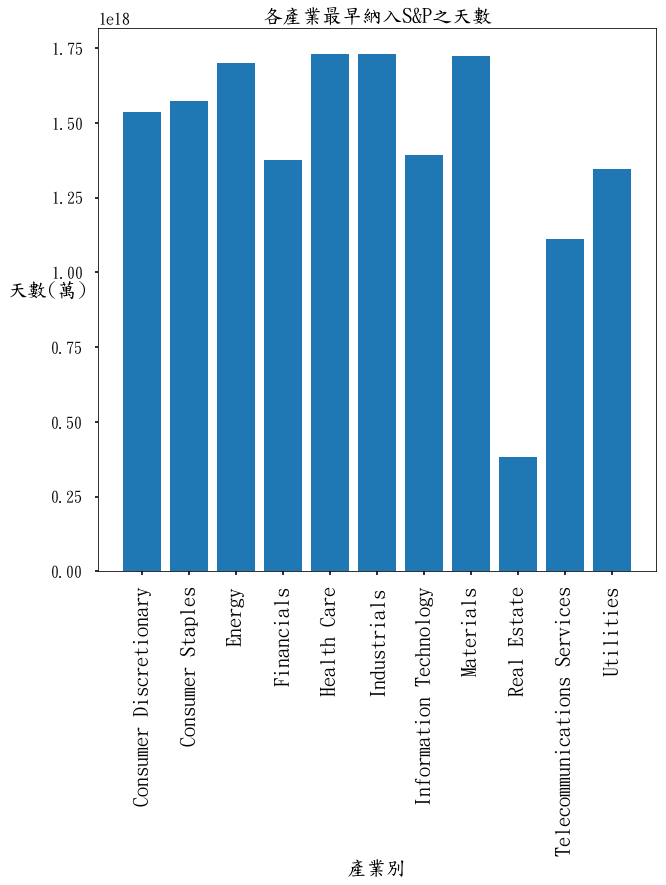

In [14]:
#繪圖
#style
plt.style.use("seaborn-poster")
fig = plt.figure()
fig.set_size_inches(10, 10)
#顯示中文
plt.rcParams['font.family']='DFKai-SB'
#繪圖
plt.bar(earlyest.index,earlyest["Days to now"],align='center')
plt.title("各產業最早納入S&P之天數",fontsize=20,fontweight='bold')
plt.xlabel('產業別',fontsize=20,fontweight='bold') #X軸名稱
plt.ylabel('天數(萬)',fontsize=20,fontweight='bold',rotation = "horizontal") #Y軸名稱
plt.xticks(earlyest.index, earlyest.index,fontsize=20,fontweight='bold', rotation=90)#調整坐標軸角度
#plt.savefig("各產業最早納入S&P之天數.png",format='png', dpi=300, pad_inches = 0)

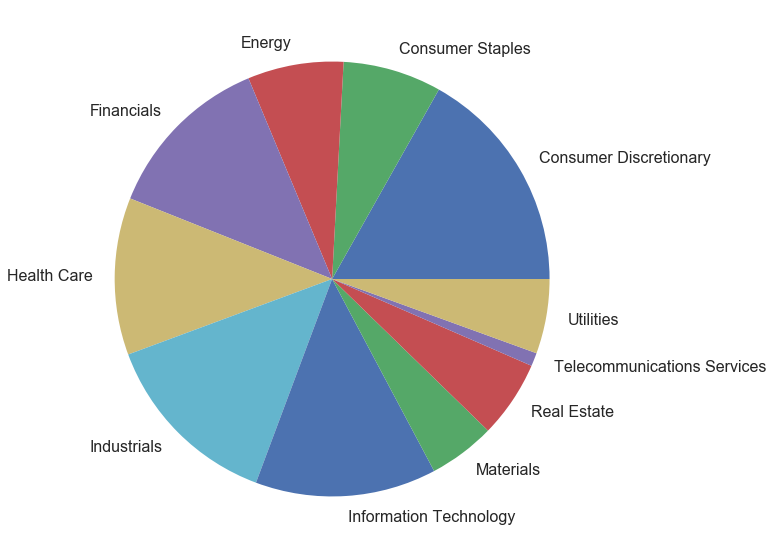

In [203]:
#各產業於S&P500之比例(數量)
amount =  pd.DataFrame(securities["Security"].groupby(securities["GICS Sector"]).count())
#繪圖
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-poster")
fig = plt.figure(figsize = (10,10))
plt.pie(amount,labels = amount.index)
plt.savefig("各產業於S&P之比例.png",format='png', dpi=300, pad_inches = 0)
# 第一次執行會有相鄰顏色相同的問題

In [206]:
amount

,Security
GICS Sector,
Consumer Discretionary,85
Consumer Staples,37
Energy,36
Financials,64
Health Care,59
Industrials,69
Information Technology,68
Materials,25
Real Estate,29


## 創建變數
創建變數以進行機器學習

分析換倉日以及星期幾對於隔日開盤之影響

In [15]:
price["weekday"] = price.index.weekday+1
price

,symbol,open,close,low,high,volume,weekday
date,,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,3
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,4
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,5
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,1
2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0,2
2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0,3
2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0,4
2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0,5


In [16]:
#視覺化觀察 隔週開盤
price_close = price[["close",'weekday']]
price_close_1 = price[price['weekday'] ==1]

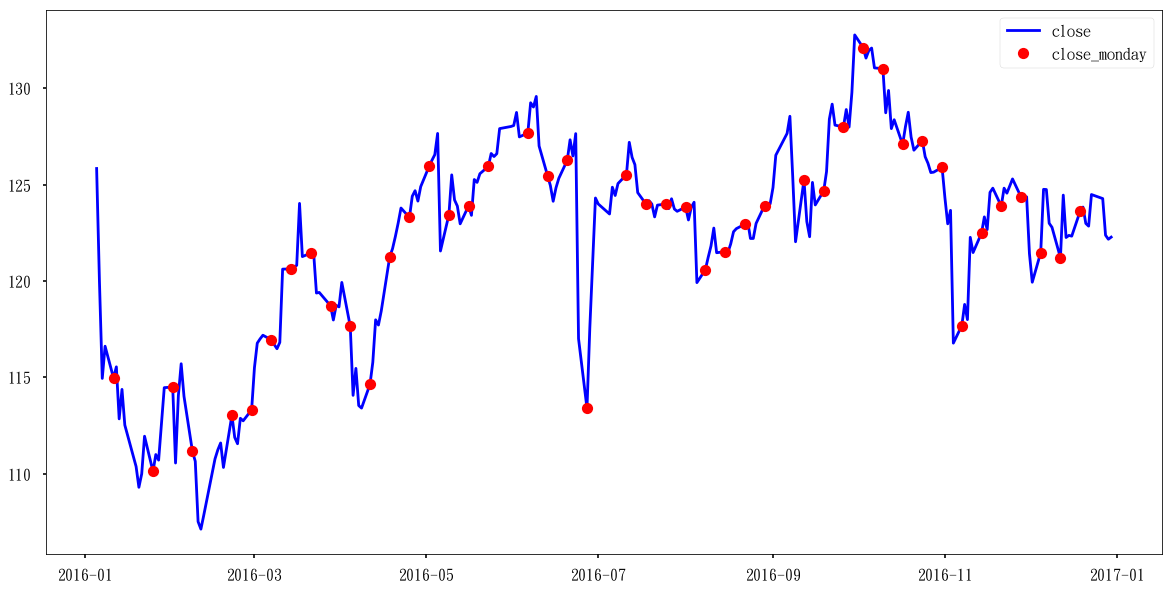

In [23]:
fig = plt.figure(figsize = (20,10))
plt.plot(price_close["close"],"b-",label = 'close')
plt.plot(price_close_1["close"],"ro",label = "close_monday")
plt.legend(loc='upper right')

In [28]:
#設定結算日
#分開計算加速
count = 0
price_close["settlement"] = 0
price_settle = price_close[["weekday","settlement"]]
for time in price_settle.index:
    if time.month == 3 or time.month == 6 or time.month == 9 or time.month == 12:
        if price_settle.loc[time]["weekday"] == 5:
            count +=1
        if count == 3:
            count = 0
            price_settle.loc[time-timedelta(1,0,0)]["settlement"] = 1
        else:
            price_settle.loc[time]["settlement"] = 0
    else:
        price_settle.loc[time]["settlement"] = 0
price_settle.loc[datetime(2016,9,8)]["settlement"] = 0
print(price_settle[price_settle["settlement"]==1])

            weekday  settlement
date                           
2016-03-17        4           1
2016-06-16        4           1
2016-09-29        4           1
2016-12-15        4           1


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
#合併結果
price = pd.merge(price,price_settle,left_on = 'date',right_on = 'date',how ='left')

In [30]:
price.head()

,symbol,open,close,low,high,volume,weekday_x,answer,weekday_y,settlement
date,,,,,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2,0.0,2,0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,3,1.0,3,0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,4,1.0,4,0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,5,0.0,5,0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,1,1.0,1,0


In [31]:
del price["weekday_y"]

In [32]:
#加入幾號以分析月尾月首之影響
price["monthday"] = price.index.day
price.head()

,symbol,open,close,low,high,volume,weekday_x,answer,settlement,monthday
date,,,,,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2,0.0,0,5
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,3,1.0,0,6
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,4,1.0,0,7
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,5,0.0,0,8
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,1,1.0,0,11


In [33]:
price["mean_c"] = price['close'].rolling(window = 5,min_periods = 1).mean()
price["std_c"] = price["close"].rolling(window = 5,min_periods = 0).std()

In [34]:
price["std_c"] = price["std_c"].fillna(0)

In [35]:
price.head()

,symbol,open,close,low,high,volume,weekday_x,answer,settlement,monthday,mean_c,std_c
date,,,,,,,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2,0.0,0,5,125.839996,0.000000
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,3,1.0,0,6,122.909999,4.143641
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,4,1.0,0,7,120.256665,5.450268
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,5,0.0,0,8,119.347500,4.807280
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,1,1.0,0,11,118.472000,4.600539


In [36]:
#創建答案列
import numpy as np
answer = np.zeros(price["close"].shape[0])
record = 0
count = 0
for time in price.index:
    if count > 0:
        if price.loc[time]['close'] < record: #今天比昨天高
            answer[count] = 1 #higher
        else:
            answer[count] = 0 #lower
    record = price.loc[time]['close']
    count+=1
answer

array([0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1.

In [37]:
#合併
price["answer"] = answer

In [38]:
price.head()

,symbol,open,close,low,high,volume,weekday_x,answer,settlement,monthday,mean_c,std_c
date,,,,,,,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2,0.0,0,5,125.839996,0.000000
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,3,1.0,0,6,122.909999,4.143641
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,4,1.0,0,7,120.256665,5.450268
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,5,0.0,0,8,119.347500,4.807280
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,1,1.0,0,11,118.472000,4.600539


# 建立模型並訓練
## 隨機森林

In [88]:
from sklearn.model_selection import train_test_split
X = price.iloc[:,1:]
del X["answer"]
y = price["answer"]
X_train,X_test,y_train,y_test = train_test_split(X ,y , test_size = 0.04) #預測隨機11日的漲跌

In [89]:
y_test.shape

(11,)

In [90]:
# 建立 random forest 模型
forest = ensemble.RandomForestClassifier(n_estimators = 200)

In [91]:
forest_fit = forest.fit(X_train,y_train)

In [92]:
# 視覺化混淆矩陣
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [93]:
# 模型評估
metrics.accuracy_score(y_test, forest.predict(X_test))

0.5454545454545454

In [94]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, forest.predict(X_test))
print (cnf_matrix)

[[4 2]
 [3 2]]


Confusion matrix, without normalization
[[4 2]
 [3 2]]


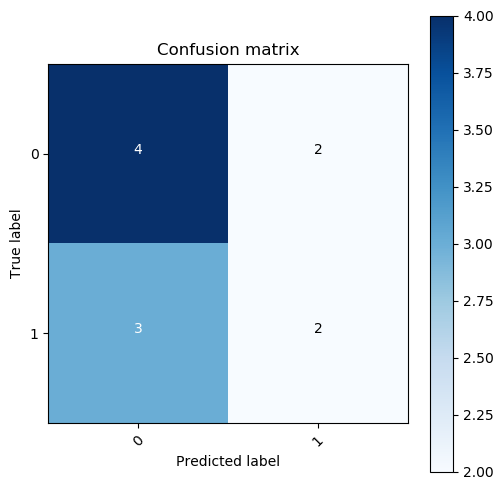

In [95]:
plt.style.use("default")
import itertools
target_names = ['0','1']
fig = plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix')

plt.savefig("confusion matrix.png")

In [106]:
from sklearn.metrics import classification_report
print("Random Forest Model")
print(classification_report(y_test, forest.predict(X_test), target_names=target_names))

Random Forest Model
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.50      0.40      0.44         5

   micro avg       0.55      0.55      0.55        11
   macro avg       0.54      0.53      0.53        11
weighted avg       0.54      0.55      0.54        11



In [119]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(forest_fit, random_state=1).fit(X_train, y_train)

In [120]:
#評估各項參數
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3008 ± 0.0122,close
0.1933 ± 0.0485,open
0.0967 ± 0.0226,mean_c
0.0175 ± 0.0097,volume
0.0092 ± 0.0033,std_c
0.0067 ± 0.0041,monthday
0.0050 ± 0.0033,weekday_x
0.0008 ± 0.0033,high
0.0008 ± 0.0033,low
0 ± 0.0000,settlement


# LGBM

In [41]:
import lightgbm as lgbm

In [125]:
# set hyper-paras
params={'objective':'binary',
        'metric': '',
        'learning_rate':0.05,
        'n_estimators':200,
        'colsample_bytree':0.7,
        'subsample':0.7,
        'random_state':2,
        'num_leaves':32, 
        'max_depth':14
       }

In [126]:
# 建立 lgbm 模型
lgbm_c = lgbm.LGBMClassifier(**params)

In [127]:
lgbm_c.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
        importance_type='split', learning_rate=0.05, max_depth=14,
        metric='', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=32,
        objective='binary', random_state=2, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=0.7, subsample_for_bin=200000,
        subsample_freq=0)

In [100]:
lgbm_c.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.7,
 'importance_type': 'split',
 'learning_rate': 0.05,
 'max_depth': 14,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'num_leaves': 32,
 'objective': 'binary',
 'random_state': 2,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 0.7,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'metric': 'mae'}

Plotting feature importances...


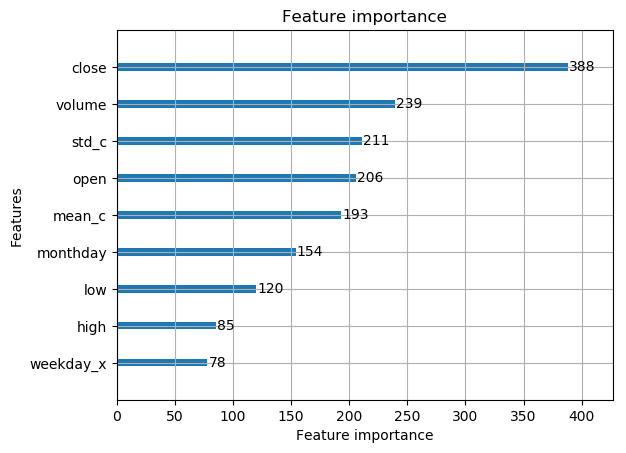

In [101]:
print('Plotting feature importances...')
ax = lgbm.plot_importance(lgbm_c, max_num_features=10)
plt.savefig("Feature importance.png")

In [118]:
perm = PermutationImportance(lgbm_c, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3975 ± 0.0310,close
0.2583 ± 0.0462,open
0.2042 ± 0.0307,mean_c
0.0733 ± 0.0323,std_c
0.0675 ± 0.0062,monthday
0.0542 ± 0.0175,volume
0.0300 ± 0.0122,low
0.0167 ± 0.0105,weekday_x
0.0033 ± 0.0062,high
0 ± 0.0000,settlement


In [133]:
# 模型評估
metrics.accuracy_score(y_test, lgbm_c.predict(X_test))

0.6363636363636364

In [103]:
cnf_matrix = confusion_matrix(y_test, lgbm_c.predict(X_test))
print (cnf_matrix)

[[4 2]
 [2 3]]


In [117]:
from sklearn.metrics import classification_report
print("LightGBM")
print(classification_report(y_test, forest.predict(X_test), target_names=target_names))

LightGBM
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.50      0.40      0.44         5

   micro avg       0.55      0.55      0.55        11
   macro avg       0.54      0.53      0.53        11
weighted avg       0.54      0.55      0.54        11



Confusion matrix, without normalization
[[4 2]
 [2 3]]


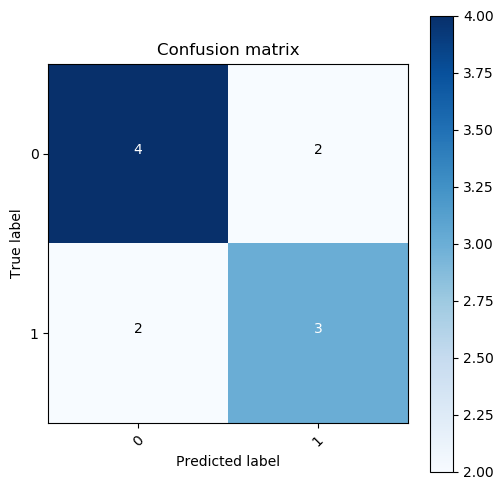

In [105]:
target_names = ['0','1']
fig = plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix')

plt.savefig("confusion matrix2.png")

In [128]:
import shap

In [129]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(lgbm_c)

C extension was not built during install!


In [130]:
# 計算shap值
shap_values = explainer.shap_values(X_train)

In [131]:
shap_values.shape

(240, 10)

In [134]:
shap.initjs()

# 選擇解釋目標
row = 6
# 視覺化各參數貢獻
#for row in range(len(y_test)):
shap.force_plot(explainer.expected_value, shap_values[row-1,:], X_train.iloc[row-1,:])

In [135]:
lgbm_c.predict_proba(X_train)[5]

array([0.79649893, 0.20350107])

In [257]:
lgbm_c.predict_proba(X_train)

array([[0.91, 0.09],
       [0.87, 0.13],
       [0.34, 0.66],
       [0.03, 0.97],
       [0.73, 0.27],
       [0.7 , 0.3 ],
       [0.8 , 0.2 ],
       [0.14, 0.86],
       [0.99, 0.01],
       [0.93, 0.07],
       [0.8 , 0.2 ],
       [0.08, 0.92],
       [0.91, 0.09],
       [0.84, 0.16],
       [0.89, 0.11],
       [0.88, 0.12],
       [0.82, 0.18],
       [0.34, 0.66],
       [0.67, 0.33],
       [0.4 , 0.6 ],
       [0.04, 0.96],
       [0.21, 0.79],
       [0.18, 0.82],
       [0.73, 0.27],
       [0.71, 0.29],
       [0.85, 0.15],
       [0.31, 0.69],
       [0.7 , 0.3 ],
       [0.21, 0.79],
       [0.86, 0.14],
       [0.91, 0.09],
       [0.37, 0.63],
       [0.8 , 0.2 ],
       [0.08, 0.92],
       [0.04, 0.96],
       [0.58, 0.42],
       [0.11, 0.89],
       [0.15, 0.85],
       [0.96, 0.04],
       [0.15, 0.85],
       [0.19, 0.81],
       [0.42, 0.58],
       [0.33, 0.67],
       [0.87, 0.13],
       [0.09, 0.91],
       [0.88, 0.12],
       [0.15, 0.85],
       [0.76,

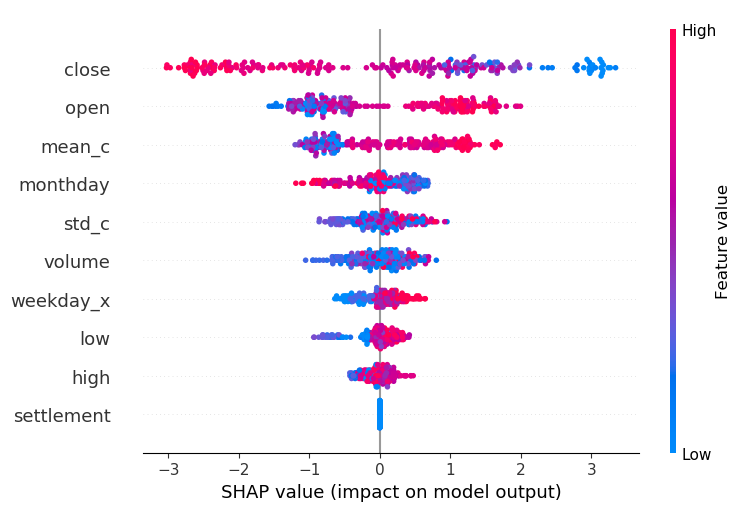

In [121]:
shap.summary_plot(shap_values,X_train)